# Ch `03`: Concept `02`

## Polynomial regression

Import the relevant libraries and initialize the hyper-parameters

In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.01
training_epochs = 40

Set up some fake raw input data

In [14]:
trX = np.linspace(-1, 1, 101)

Set up raw output data based on a degree 6 polynomial

In [15]:
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)

Add some noise

In [16]:
trY += np.random.randn(*trX.shape) * 1.5

Plot the raw data

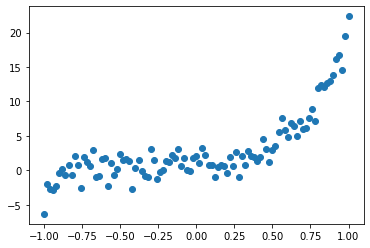

In [17]:
plt.scatter(trX, trY)
plt.show()

Define the nodes to hold values for input/output pairs

In [18]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

Define our polynomial model

In [19]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

Set up the parameter vector to all zero

In [20]:
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

Define the cost function just as before

In [21]:
cost = tf.reduce_sum(tf.square(Y-y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Set up the session and run the learning algorithm just as before

In [22]:
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
print(w_val)

[0.80262506 1.1706418  4.4900465  4.7393293  3.3747447  5.734086  ]


Close the session when done

In [23]:
sess.close()

Plot the result

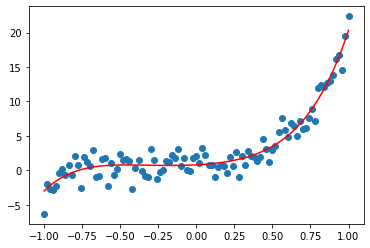

In [24]:
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()